#  LabTest: ML model deployment



ปรับแต่งโค้ดที่ให้มาเพื่อสร้างโมเดล และ Deploy บน Streamlit


 ส่ง
- LabTest-66130701711.ipynb
- model_penguin_66130701711.pkl
- app_predict_penguin_66130701711.py
- LabTest-66130701711.pdf


### Connect Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/MyDrive/!!!Workshop698-1-67/Mini-Exam

/content/drive/MyDrive/!!!Workshop698-1-67/Mini-Exam


In [6]:
!ls

confusion_matrix_randomforest.png  LabTest-66130701711.ipynb  LabTest-xxxx.docx  penguins_size.csv


## Import Packages

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


## Prepare Data

In [8]:
df_org = pd.read_csv("penguins_size.csv")
df_org.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [9]:
df = df_org.copy()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Handle Missing Data

In [10]:
df.isna().sum()/len(df)*100

,0
species,0.000000
island,0.000000
culmen_length_mm,0.581395
culmen_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,2.906977


In [11]:
df= df.dropna(subset = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g'])
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])

In [12]:
df.isna().sum()/len(df)*100

,0
species,0.0
island,0.0
culmen_length_mm,0.0
culmen_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0


## Categotical Encoding

In [13]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [14]:
df['species'].unique()
# df['island'].unique()
# df['sex'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [15]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# species_encoder = LabelEncoder().fit(['Adelie', 'Chinstrap', 'Gentoo'])
species_encoder = LabelEncoder().fit(df['species'])

# island_encoder = LabelEncoder().fit(['Torgersen', 'Biscoe', 'Dream'])
island_encoder = LabelEncoder().fit(df['island'])

# sex_encoder = LabelEncoder().fit(['MALE', 'FEMALE'])
sex_encoder = LabelEncoder().fit(df['sex'])


In [16]:
species_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Train/Test Data Split

In [17]:
X = df.drop('species', axis=1)
y = df['species']

In [18]:
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
115,Biscoe,42.7,18.3,196.0,4075.0,MALE
8,Torgersen,34.1,18.1,193.0,3475.0,MALE
138,Dream,37.0,16.5,185.0,3400.0,FEMALE
333,Biscoe,51.5,16.3,230.0,5500.0,MALE
305,Biscoe,50.8,17.3,228.0,5600.0,MALE
...,...,...,...,...,...,...
189,Dream,52.0,20.7,210.0,4800.0,MALE
72,Torgersen,39.6,17.2,196.0,3550.0,FEMALE
107,Biscoe,38.2,20.0,190.0,3900.0,MALE
271,Biscoe,48.5,14.1,220.0,5300.0,MALE


In [20]:
y_train

,species
115,Adelie
8,Adelie
138,Adelie
333,Gentoo
305,Gentoo
...,...
189,Chinstrap
72,Adelie
107,Adelie
271,Gentoo


In [21]:
X_test

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
238,Biscoe,46.2,14.5,209.0,4800.0,FEMALE
117,Torgersen,37.3,20.5,199.0,3775.0,MALE
114,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
43,Dream,44.1,19.7,196.0,4400.0,MALE
127,Torgersen,41.5,18.3,195.0,4300.0,MALE
...,...,...,...,...,...,...
174,Dream,43.2,16.6,187.0,2900.0,FEMALE
73,Torgersen,45.8,18.9,197.0,4150.0,MALE
76,Torgersen,40.9,16.8,191.0,3700.0,FEMALE
17,Torgersen,42.5,20.7,197.0,4500.0,MALE


In [22]:
y_test

,species
238,Gentoo
117,Adelie
114,Adelie
43,Adelie
127,Adelie
...,...
174,Chinstrap
73,Adelie
76,Adelie
17,Adelie


## Trining / Create Model using RandomForest Alg

In [23]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'island' is the categorical column
categorical_features = ['island']
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) # Use OneHotEncoder for categorical features
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Update the pipeline with the preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'rf__n_estimators': [10, 100, 1000],
    'rf__max_depth': [None, 10, 20],
}

# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the pipeline with GridSearchCV
grid_search.fit(X_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'rf__max_depth': None, 'rf__n_estimators': 100}
Accuracy on Test Set: 0.9855072463768116
Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        35
   Chinstrap       0.92      1.00      0.96        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



## Testing / Evaluation

              precision    recall  f1-score   support

      Adelie     1.0000    0.9714    0.9855        35
   Chinstrap     0.9231    1.0000    0.9600        12
      Gentoo     1.0000    1.0000    1.0000        22

    accuracy                         0.9855        69
   macro avg     0.9744    0.9905    0.9818        69
weighted avg     0.9866    0.9855    0.9857        69



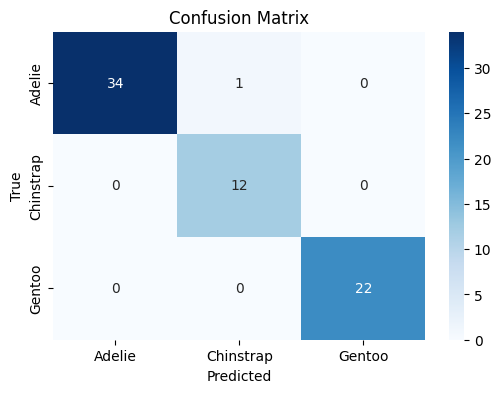

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder if not already imported

# Assuming y_train contains the original target labels
label_encoder = LabelEncoder()  # Initialize LabelEncoder
label_encoder.fit(y_train)  # Fit LabelEncoder to y_train

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Generate classification report
summary_eval = classification_report(y_test, y_pred, digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,  # Use classes from the fitted label_encoder
            yticklabels=label_encoder.classes_)  # Ensure the labels are consistent
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_randomforest.png')

# Display the plot
plt.show()


## Save Model and etc.

In [25]:
# Create a tuple or any container object with your variables
data_to_save = (model, species_encoder, island_encoder ,sex_encoder)

# Open a file in binary write mode
with open('model_penguin_66130701711.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

In [26]:
import pickle
import pandas as pd

In [27]:
# Update the file name to match the file that was saved in cell 23
with open('model_penguin_66130701711.pkl', 'rb') as file:
    # Load the data from the file
    model, species_encoder, island_encoder ,sex_encoder = pickle.load(file)

### New data

In [28]:
x_new =  pd.DataFrame()
x_new['island'] = ['Torgersen']
x_new['culmen_length_mm'] = [37.0]
x_new['culmen_depth_mm'] = [19.3]
x_new['flipper_length_mm'] = [192.3]
x_new['body_mass_g'] = [3750]
x_new['sex'] = ['MALE']


### Categorical Data Encoding

In [29]:
x_new['island'] = island_encoder.transform(x_new['island'])
x_new['sex'] = sex_encoder.transform(x_new['sex'])


### Predicting

In [35]:
# Create new data for prediction
x_new = pd.DataFrame({
    'island': ['Torgersen'],
    'culmen_length_mm': [37.0],
    'culmen_depth_mm': [19.3],
    'flipper_length_mm': [192.3],
    'body_mass_g': [3750],
    'sex': ['MALE']
})

# Ensure the column data types match the training data
x_new['island'] = x_new['island'].astype(str)
x_new['sex'] = x_new['sex'].astype(str)

# Use the fitted pipeline (model) to make predictions
y_pred_new = best_estimator.predict(x_new)

# Print the predicted species directly
print('Predicted Species:', y_pred_new)


Predicted Species: ['Adelie']


### Create app_predict_knn_penguin.py for Running with streamlit

https://docs.streamlit.io/library/api-reference

streamlit run app_predict_knn_penguin.py

In [36]:
%%writefile app_predict_penguin_66130701711.py


#xxxx



Writing app_predict_penguin_66130701711.py


## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://github.com/



In [37]:
%%writefile requirements.txt

scikit-learn
pandas


Writing requirements.txt
